In [4]:
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import seaborn as sb
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D
import numpy as np

In [5]:
(x_tr, y_tr), (x_ts, y_ts) = mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


In [6]:
x_tr

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
x_tr[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

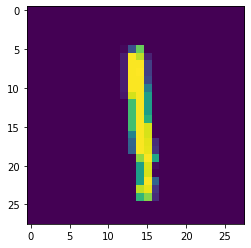

In [23]:
plt.imshow(x_tr[8])

In [24]:
y_tr[8]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
x_tr[0].shape

(28, 28)

In [14]:
x_tr = x_tr.reshape(60000, 28, 28, 1)
x_ts = x_ts.reshape(10000, 28, 28, 1)

In [15]:
y_tr[2]

4

In [16]:
y_tr = to_categorical(y_tr)
y_ts = to_categorical(y_ts)

In [17]:
y_tr[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
y_tr[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
model = Sequential()

2022-04-23 11:29:43.117007: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(x_tr, y_tr, validation_data=(x_ts, y_ts), epochs=1)

1875/1875 [==============================] - 1190s 629ms/step - loss: 0.2229 - accuracy: 0.9528 - val_loss: 0.0766 - val_accuracy: 0.9750


In [ ]:
# from PIL import Image
# image = Image.open(...)
# numpy.array(image)

In [ ]:
# Pillow

In [50]:
res = model.predict(x_ts[214:215])

In [51]:
res

array([[2.9419912e-08, 1.1902296e-06, 2.3986473e-08, 1.4929655e-07,
        7.9714862e-04, 2.9248456e-06, 3.1262815e-10, 1.5421007e-03,
        4.0858272e-03, 9.9357069e-01]], dtype=float32)

In [52]:
y_ts[214:215]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [53]:
res = res.tolist()

In [54]:
res = res[0]

In [55]:
res

[2.9419911840022905e-08,
 1.1902295682375552e-06,
 2.3986473252080032e-08,
 1.4929655378637108e-07,
 0.000797148619312793,
 2.924845603047288e-06,
 3.126281455934077e-10,
 0.0015421006828546524,
 0.004085827153176069,
 0.9935706853866577]

In [56]:
res = [i*(10**10) for i in res]

In [57]:
res

[294.19911840022905,
 11902.295682375552,
 239.86473252080032,
 1492.9655378637108,
 7971486.19312793,
 29248.45603047288,
 3.126281455934077,
 15421006.828546524,
 40858271.53176069,
 9935706853.866577]

In [58]:
res.index(max(res))

9

In [72]:
print(x_tr[0].tolist()[0])

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]


In [69]:
for i in x_tr[0].tolist():
    for j in i:
        print(str(j[0])[0], end='')
    print()

0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000003111111212210000
0000000033911222222122160000
0000000422222222229885300000
0000000122222211220000000000
0000000081122210410000000000
0000000001112900000000000000
0000000000012120000000000000
0000000000011270000000000000
0000000000003221110000000000
0000000000000822212000000000
0000000000000041221200000000
0000000000000001922100000000
0000000000000000022260000000
0000000000000041122220000000
0000000000003122222100000000
0000000000212222227000000000
0000000026222221820000000000
0000001122222189000000000000
0000512222221100000000000000
0000122221110000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000


In [73]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [74]:
model = rfc(n_estimators=100)

In [75]:
model.fit(x_tr, y_tr)

ValueError: Found array with dim 4. Estimator expected <= 2.